# PISA 2012 Data Presentation
## by Nadine Amin

## Dataset Overview

> PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It focuses on examining how well prepared the students are for life beyond school.

> Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.

## Investigation Overview

> The goal of this presentation is to show the most important findings of this study. Many variables were examined to see which would have the greatest effects on the students' total scores in maths, reading and science.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('df.csv', encoding = "ISO-8859-1")
base_color = sb.color_palette()[0]

In [3]:
# Change the Mother and Father Jobs to ordinal data

job_classes = ['Other', 'Looking', 'Part-time', 'Full-time']
jclasses = pd.api.types.CategoricalDtype(ordered = True, categories = job_classes)
j_vars = ['Mother_Job', 'Father_Job']

for i in range(len(j_vars)):
    df[j_vars[i]] = df[j_vars[i]].astype(jclasses)

In [4]:
# Change the Mother and Father Schooling to ordinal data

school_classes = ['< Level 1', 'Level 1', 'Level 2', 'Level 3A', 'Level 3B or 3C']
sclasses = pd.api.types.CategoricalDtype(ordered = True, categories = school_classes)
s_vars = ['Mother_Schooling', 'Father_Schooling']

for i in range(len(s_vars)):
    df[s_vars[i]] = df[s_vars[i]].astype(sclasses)

In [5]:
# For the number of cellphones, TVs and computers, we can change them to ordinal data

no_classes = ['None', 'One', 'Two', 'Three or more']
nclasses = pd.api.types.CategoricalDtype(ordered = True, categories = no_classes)
no_vars = ['No_Cellphones', 'No_TVs', 'No_Computers']

for i in range(len(no_vars)):
    df[no_vars[i]] = df[no_vars[i]].astype(nclasses)

In [6]:
# Change the number of books to ordinal data

book_classes = ['0-10', '11-25', '26-100', '101-200', '201-500', '500+']
bclasses = pd.api.types.CategoricalDtype(ordered = True, categories = book_classes)
df['No_Books'] = df['No_Books'].astype(bclasses)

## Number of Cellphones, TVs, Computers & Books vs. Total Score

> This violin plots show that students who own three or more cellphones, TVs and computers have a higher chance of getting a higher total score. Moreover, students who have more than 200 books have a greater chance in getting a higher score.

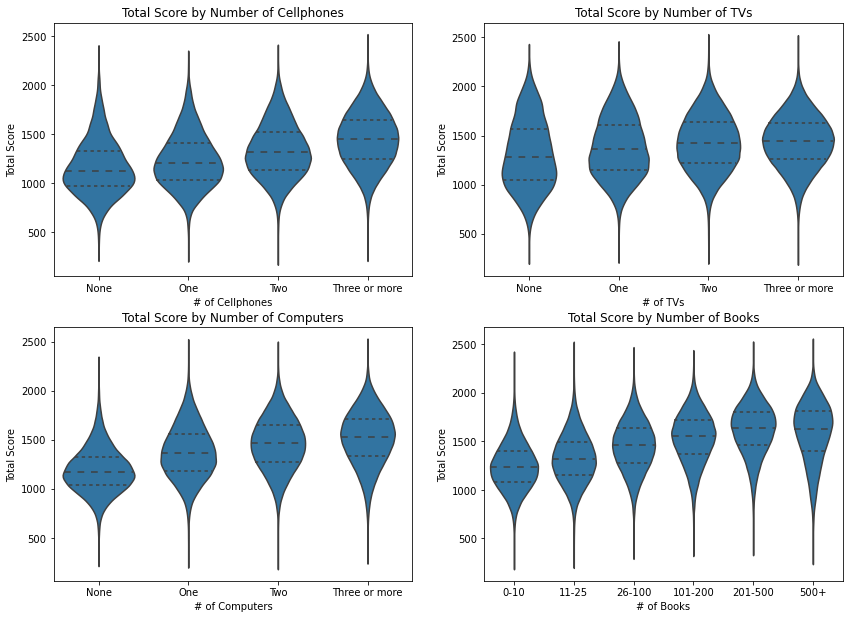

In [25]:
# Setting the size of the plot

plt.figure(figsize = [11.69/2, 8.27/2])

# First Plot - Number of Cellphones:

plt.subplot(2, 2, 1)
sb.violinplot(data = df, x = 'No_Cellphones', y = 'Total_Score', inner = 'quartile', color = base_color);
plt.title('Total Score by Number of Cellphones')
plt.xlabel('# of Cellphones')
plt.ylabel('Total Score');

# Second Plot - Number of TVs:

plt.subplot(2, 2, 2)
sb.violinplot(data = df, x = 'No_TVs', y = 'Total_Score', inner = 'quartile', color = base_color);
plt.title('Total Score by Number of TVs')
plt.xlabel('# of TVs')
plt.ylabel('Total Score');

# Third Plot - Number of Computers:

plt.subplot(2, 2, 3)
sb.violinplot(data = df, x = 'No_Computers', y = 'Total_Score', inner = 'quartile', color = base_color);
plt.title('Total Score by Number of Computers')
plt.xlabel('# of Computers')
plt.ylabel('Total Score');

# Fourth Plot - Number of Books:

plt.subplot(2, 2, 4)
sb.violinplot(data = df, x = 'No_Books', y = 'Total_Score', inner = 'quartile', color = base_color);
plt.title('Total Score by Number of Books')
plt.xlabel('# of Books')
plt.ylabel('Total Score');

plt.subplots_adjust(left=None, bottom=None, right=2, top=2, wspace=None, hspace=None)

## Parents' Schooling vs. Total Score

> Parents who finished level 3A schooling were the ones with the highest total score average.

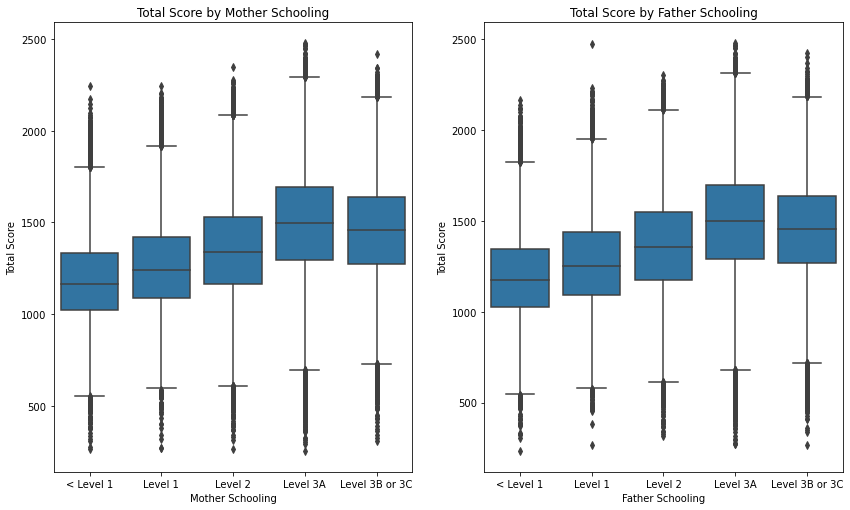

In [27]:
# Setting the size of the plot

plt.figure(figsize = [11.69/2, 8.27])

# First Plot - Mothers' Schooling:

plt.subplot(1, 2, 1)
sb.boxplot(data = df, x = 'Mother_Schooling', y = 'Total_Score', color = base_color);
plt.title("Total Score by Mother Schooling")
plt.xlabel('Mother Schooling')
plt.ylabel('Total Score');

# Second Plot - Fathers' Schooling:

plt.subplot(1, 2, 2)
sb.boxplot(data = df, x = 'Father_Schooling', y = 'Total_Score', color = base_color);
plt.title("Total Score by Father Schooling")
plt.xlabel('Father Schooling')
plt.ylabel('Total Score');

plt.subplots_adjust(left=None, bottom=None, right=2, top=None, wspace=None, hspace=None)

## Parents' Jobs vs. Total Score

> Parents with full time jobs had the highest student mean score.

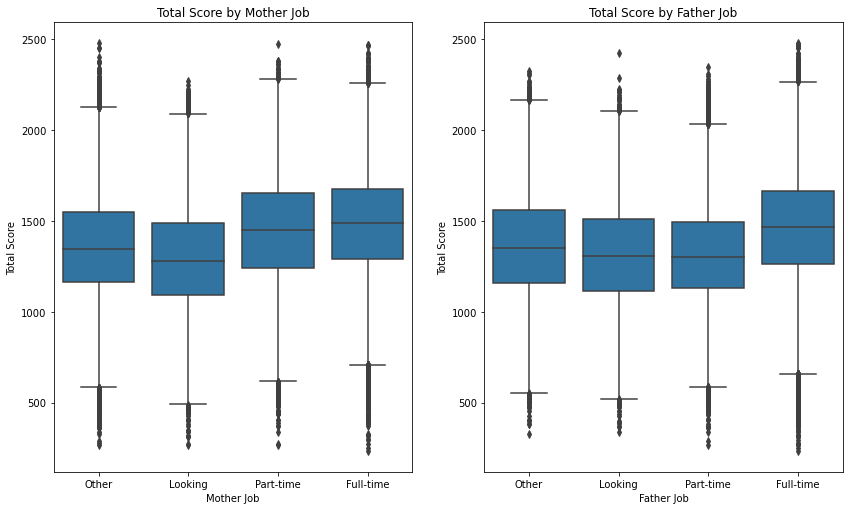

In [28]:
# Setting the size of the plot

plt.figure(figsize = [11.69/2, 8.27])

# First Plot - Mothers' Job:

plt.subplot(1, 2, 1)
sb.boxplot(data = df, x = 'Mother_Job', y = 'Total_Score', color = base_color);
plt.title("Total Score by Mother Job")
plt.xlabel('Mother Job')
plt.ylabel('Total Score');

# Second Plot - Fathers' Job:

plt.subplot(1, 2, 2)
sb.boxplot(data = df, x = 'Father_Job', y = 'Total_Score', color = base_color);
plt.title("Total Score by Father Job")
plt.xlabel('Father Job')
plt.ylabel('Total Score');

plt.subplots_adjust(left=None, bottom=None, right=2, top=None, wspace=None, hspace=None)

## Homework Study Time vs. Total Score

> The more hours a student spends in studying homework, the higher their chances in getting a higher total score.

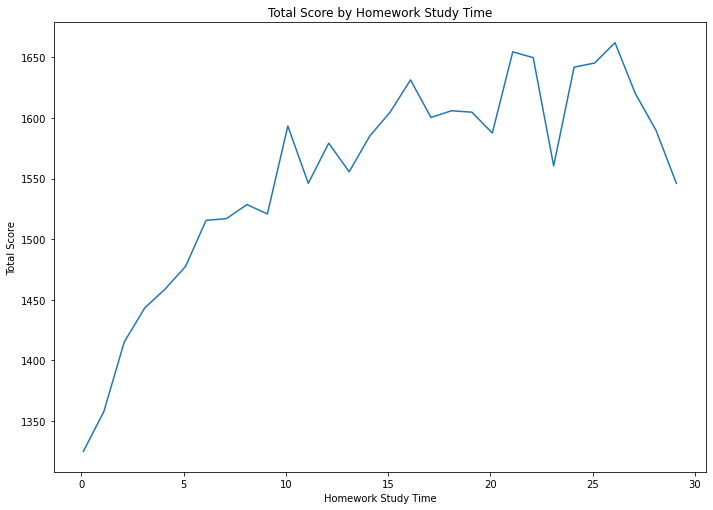

In [15]:
bin_edges = np.arange(0, 30+1, 1)
bin_centers = bin_edges[:-1] + 0.1


study_bin = pd.cut(df['Homework_Study_Time'], bin_edges, include_lowest = True)
study_mean = df['Total_Score'].groupby(study_bin).mean()
study_std = df['Total_Score'].groupby(study_bin).std()

plt.figure(figsize = [11.69, 8.27])
plt.errorbar(x = bin_centers, y = study_mean)
plt.title("Total Score by Homework Study Time")
plt.ylabel('Total Score')
plt.xlabel('Homework Study Time');

## Number of Cellphones vs. Total Score by Parents' Jobs

> Higher averages of total scores were obtained when the students had three or more cellphones and their parents had full-time jobs.



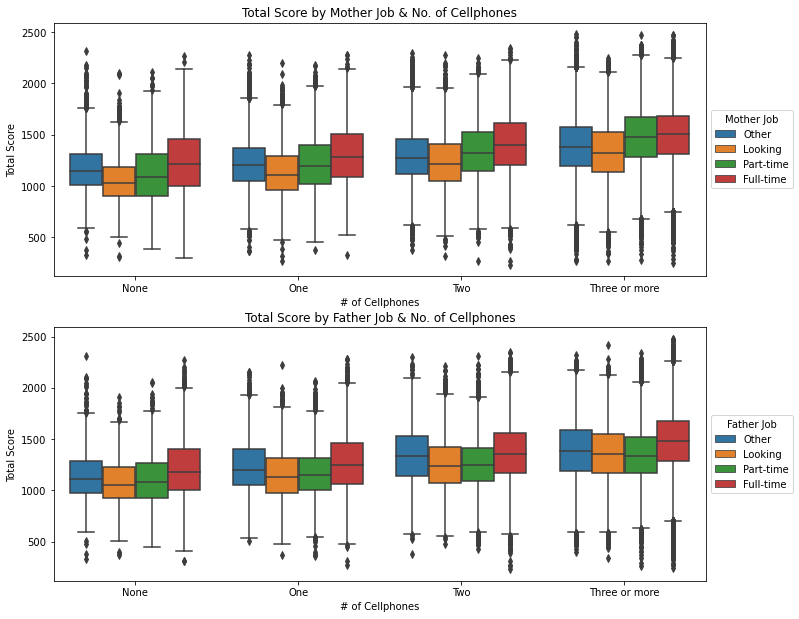

In [24]:
# First Plot - Mothers' Job:

plt.figure(figsize = [11.69, 8.27/2])
plt.subplot(2, 1, 1)
sb.boxplot(data = df, x = 'No_Cellphones', y = 'Total_Score', hue = 'Mother_Job');
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5), title='Mother Job');
plt.title("Total Score by Mother Job & No. of Cellphones")
plt.xlabel('# of Cellphones')
plt.ylabel('Total Score');

# Second Plot - Fathers' Job:

plt.subplot(2, 1, 2)
sb.boxplot(data = df, x = 'No_Cellphones', y = 'Total_Score', hue = 'Father_Job');
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5), title='Father Job');
plt.title("Total Score by Father Job & No. of Cellphones")
plt.xlabel('# of Cellphones')
plt.ylabel('Total Score');

plt.subplots_adjust(left=None, bottom=None, right=None, top=2, wspace=None, hspace=None)

In [29]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --no-input

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 851146 bytes to slide_deck_template.slides.html
